In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [52]:
description = pd.read_csv('steamdataset/steam_description_data.csv')
media_data = pd.read_csv('steamdataset/steam_media_data.csv')
requirements_data = pd.read_csv('steamdataset/steam_requirements_data.csv')
support_info = pd.read_csv('steamdataset/steam_support_info.csv')
steam = pd.read_csv('steamdataset/steam.csv')
steam_tag_data = pd.read_csv('steamdataset/steamspy_tag_data.csv')

In [53]:
steam.sample(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2978,292380,Racer 8,2014-06-06,1,30.06 Studios Ltd,KISS ltd,windows;mac,0,Single-player;Steam Trading Cards;Steam Leader...,Casual;Racing,Casual;Racing;Puzzle,0,608,744,194,245,200000-500000,3.99
7910,436230,Detached,2017-05-18,1,Anshar Studios,Anshar Studios,windows,0,Single-player;Multi-player;Online Multi-Player...,Indie;Simulation,VR;Simulation;Space,47,138,38,0,0,0-20000,19.49
23515,895610,Where's Baby,2019-04-02,1,Well Bred Rhino,Well Bred Rhino,windows;mac,0,Single-player;Local Multi-Player;Shared/Split ...,Action;Casual,Action;Casual,0,4,0,0,0,0-20000,2.09
829,45420,Land It!,2016-08-01,1,Nemesys Games,Nemesys Games,windows;mac,0,Single-player;Steam Achievements;Partial Contr...,Casual;Indie;Simulation,Casual;Indie;Simulation,25,10,1,0,0,0-20000,6.99
8094,442770,The Minims,2016-04-01,1,beyondthosehills;Andreas Diktyopoulos,beyondthosehills;Andreas Diktyopoulos,windows;mac,0,Single-player;Steam Achievements,Adventure;Indie,Adventure;Indie;Puzzle,41,14,5,0,0,0-20000,6.99


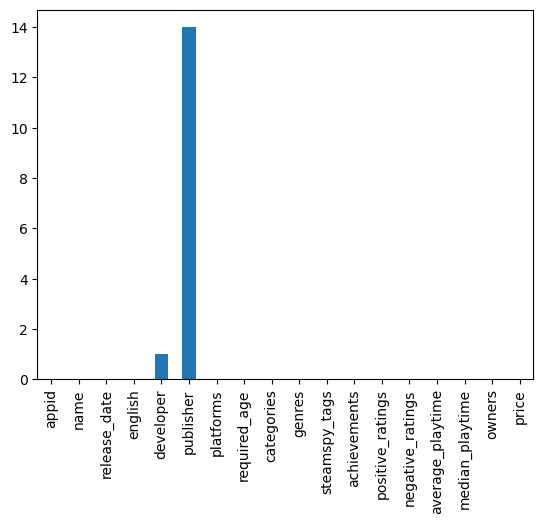

In [54]:
steam_na = steam.isna().sum()
steam_na.plot(kind='bar')
plt.show()


In [55]:
# since the number of missing values is small relativ to the dataset , im gonna drop those lines
df = steam.dropna() # steam.fillna('Missing')
